# **Notebook Content**
In this notebook, the following tasks are performed:

- Data Loading and Exploration
- Data Cleaning
- Exploratory Data Analysis (EDA)
- Data Visualization
- Data Building : Feature Transformation and Cleanup(saving cleaned datasets)

For information on the Project's Proposal, Significance and Motivation please refer to the [README
](https://github.com/Moyo-tech/DermDetect-AI/blob/main/README.md#introduction-and-background)


## **Loading Libaries and Datasets**

In [7]:
"""Import basic modules"""
import math
import os
import gc
import random
import pprint
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns

# Warning Libraries
import warnings
warnings.filterwarnings("ignore")

"""Plotly visualization"""
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

from IPython.display import Markdown, display

# utility function to print markdown string
def printmd(string):
    display(Markdown(string))

init_notebook_mode(connected=True) # to display plotly graph offline

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df_churn = pd.read_csv("./Telco-Customer-Churn.csv")

## **Understanding and Cleaning Dataset**

In [3]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
printmd(f"Dataset Dimension: **{df_churn.shape[0]}** rows,  **{df_churn.shape[1]}** columns")

Dataset Dimension: **7043** rows,  **21** columns

In [16]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<a></a>
###   **Summary of categorical features**

In [17]:
# Generate descriptive statistics for columns of object type in df_churn DataFrame, then transpose the result for better readability.
df_churn.describe(include=['object']).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


### **Finding the unique values for each column**

In [18]:
# Set a padding length for aligning the output
left_padding = 21

# Print markdown-styled header
printmd("**Unique Values By Features**")

# Iterate over each column in the DataFrame
for feature in df_churn.columns:
    uniq = np.unique(df_churn[feature])  # Calculate unique values for the column
    print(feature.ljust(left_padding), len(uniq))  # Print the column name with left padding and the number of unique values


**Unique Values By Features**

customerID            7043
gender                2
SeniorCitizen         2
Partner               2
Dependents            2
tenure                73
PhoneService          2
MultipleLines         3
InternetService       3
OnlineSecurity        3
OnlineBackup          3
DeviceProtection      3
TechSupport           3
StreamingTV           3
StreamingMovies       3
Contract              3
PaperlessBilling      2
PaymentMethod         4
MonthlyCharges        1585
TotalCharges          6531
Churn                 2


## **Cleaning the Dataset**

### **Checking for duplicates**

In [19]:
# Print the number of known and unique observations in df_churn DataFrame
print(
    'Known observations: {}\nUnique observations: {}'.format(
        len(df_churn.index),  # Calculate the total number of observations in df_churn
        len(df_churn.drop_duplicates().index)  # First, drop duplicate rows in df_churn to get only unique observations, then count the number of these unique observations
    )
)

Known observations: 7043
Unique observations: 7043


As we can see there is no duplicates found

### **Drop the CustomerID**

In [20]:
# Drop the customerID column as it would not be relevant to the prediction since new data would be given
del df_churn["customerID"]

### **Checking for Missing Values**

In [21]:
df_churn.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### **Checking missing values for object data type**

In [22]:
# Identify categorical columns by subtracting the set of numeric columns from the set of all columns
cat_cols = set(df_churn.columns) - set(df_churn._get_numeric_data().columns)

# Iterate over the identified categorical columns
for cat in cat_cols:
    # For each categorical column, count the number of empty or 'nan' string values (case insensitive)
    print(cat.ljust(left_padding),  # Print column name with left padding for alignment
          df_churn[cat].apply(lambda x: len(x.strip()) == 0 or x.strip().lower() == 'nan').sum())  # Count and print the number of 'empty' or 'nan' entries


PaymentMethod         0
DeviceProtection      0
Churn                 0
gender                0
PaperlessBilling      0
OnlineBackup          0
PhoneService          0
TechSupport           0
Dependents            0
Contract              0
StreamingTV           0
OnlineSecurity        0
MultipleLines         0
StreamingMovies       0
InternetService       0
Partner               0


As we can see TotalCharges is an object datatype, it has **11** 'nan' value

### **Handling the missing Data**

Convert **TotalCharges** to numeric

Given that "TotalCharges" likely represents the cumulative charges a customer has incurred, it's crucial to analyze it numerically to gain insights into customer behavior, spend patterns, and their potential correlation with churn.

In [23]:
# Convert the "TotalCharges" column in df_churn DataFrame to numeric type, coercing errors
df_churn["TotalCharges"] = pd.to_numeric(df_churn["TotalCharges"], errors = 'coerce')

Understanding Total Charges to perform Imputation on the Missing values

In [24]:
# Find indices of rows where "TotalCharges" is NaN and display those rows
indices_null_tc = df_churn[df_churn["TotalCharges"].isna()].index
display(df_churn.iloc[indices_null_tc])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Correlation between "Tenure" and "TotalCharges": It's noted that when customers have a "Tenure" of 0 (i.e., they're new or immediately left), their "TotalCharges" are also 0, which makes intuitive sense as they haven't incurred any charges yet.

In [25]:
# Display the first 2 rows where tenure is 1 to demonstrate the initial charges
display(df_churn[df_churn.tenure == 1].head(2))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes


**'TotalCharges' isa the same as 'MonthlyCharges' when 'Tenure' is not 0**

In [26]:
# Display the first 2 rows where tenure is 3 to demonstrate the initial charges
display(df_churn[df_churn.tenure == 3].head(2))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
65,Female,0,No,No,3,Yes,No,DSL,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,75.3,244.1,No
74,Female,0,No,Yes,3,Yes,No,DSL,Yes,No,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),64.5,177.4,No


As we can see again
- 'TotalCharges' increases with respect to 'MonthlyCharges' and 'Tenure'
-  From the above observation we can conclude that, 'TotalCharges' = 'MonthlyCharges' x 'Tenure' + Extra Cost
-  Therefore, imputing missing values on 'TotalCharges' column with 0

In [27]:
# Impute missing values in 'TotalCharges' with 0 based on the observations made
df_churn['TotalCharges'].fillna(0, inplace=True)

In [28]:
df_churn[['tenure', 'MonthlyCharges', 'TotalCharges']].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


## **Exploratory Data Analysis Visualisation**

Purpose of Conducting EDA (Exploratory Data Analysis):

- Identifying Patterns and Anomalies: This would allow us identify  patterns, trends, and anomalies in the data, which can be crucial for preprocessing steps and further analysis.

- Model Selection Guidance: The insights from EDA can help us in selecting appropriate models and techniques for the predictive modeling phase.

Churn (Target) Distribution

In [29]:
# Create a pie chart to visualize the distribution of the 'Churn' target variable
fig = px.pie(df_churn['Churn'].value_counts().reset_index().rename(columns={'index':'Type'}),
             values='Churn',
             names='Type',
             title='Churn (Target) Distribution')

# Update trace properties to display percentage and label text inside each pie chart slice
fig.update_traces(textposition='inside', textinfo='percent+label')

# Display the pie chart in a Colab notebook renderer
fig.show(renderer="colab")

**Target distribution is Imbalanced**

OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport

In [30]:
# Initialize a 2x2 subplot layout with each plot set to 'domain' type for Pie charts
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]])

# Add a pie chart for 'OnlineSecurity' to the top left slot (1,1) of the grid
fig.add_trace(go.Pie(labels=df_churn['OnlineSecurity'].value_counts().index,
                     values=df_churn['OnlineSecurity'].value_counts().values,
                     name="Online Security"), 1, 1)

# Add a pie chart for 'OnlineBackup' to the top right slot (1,2)
fig.add_trace(go.Pie(labels=df_churn['OnlineBackup'].value_counts().index,
                     values=df_churn['OnlineBackup'].value_counts().values,
                     name="Online Backup"), 1, 2)

# Add a pie chart for 'DeviceProtection' to the bottom left slot (2,1)
fig.add_trace(go.Pie(labels=df_churn['DeviceProtection'].value_counts().index,
                     values=df_churn['DeviceProtection'].value_counts().values,
                     name="Device Protection"), 2, 1)

# Add a pie chart for 'TechSupport' to the bottom right slot (2,2)
fig.add_trace(go.Pie(labels=df_churn['TechSupport'].value_counts().index,
                     values=df_churn['TechSupport'].value_counts().values,
                     name="Tech Support"), 2, 2)

# Convert the pie charts to donut charts by specifying a hole size and hover info format
fig.update_traces(hole=.5, hoverinfo="label+percent")

# Customize layout with annotations for each donut chart, adjusting text position and size
fig.update_layout(
    annotations=[dict(text='Online<br>Security', x=0.195, y=0.85, font_size=20, showarrow=False),
                 dict(text='Online<br>Backup', x=0.804, y=0.86, font_size=20, showarrow=False),
                 dict(text='Device<br>Protection', x=0.192, y=0.18, font_size=20, showarrow=False),
                 dict(text='Tech<br>Support', x=0.805, y=0.18, font_size=20, showarrow=False)])

# Adjust margin to remove extra whitespace around the charts
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))

# Display the figure in a Colab notebook
fig.show(renderer="colab")

**'Online Backup', 'Device Protection' and 'Online Security', 'Tech Support' has similar distribution**

Gender

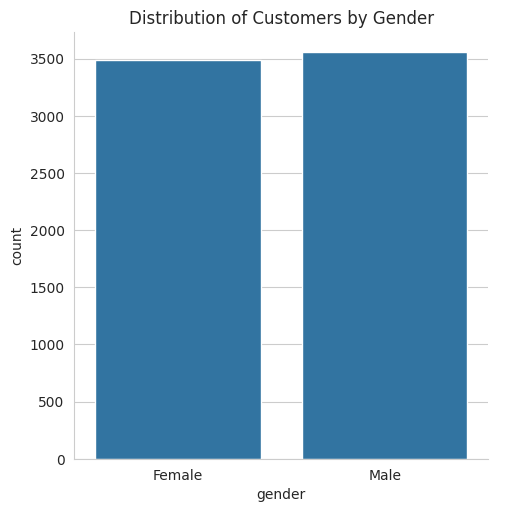

In [32]:
# Create a count plot using Seaborn to visualize the distribution of customers by gender in df_churn
sns.catplot(x="gender", kind="count", data=df_churn)

# Add a title to the plot
plt.title("Distribution of Customers by Gender")

# Display the plot
plt.show()


**Approximately 50/50 gender ratio**

Dependents

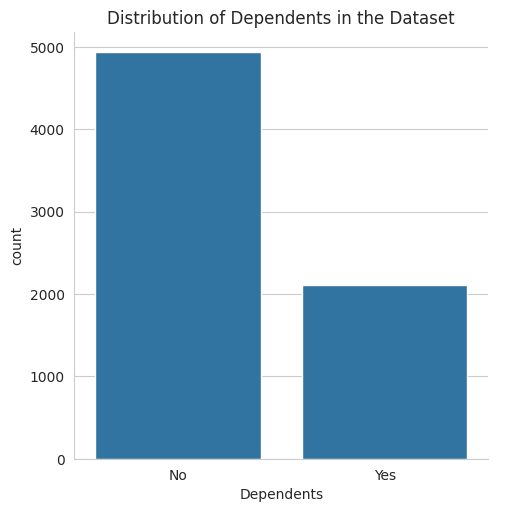

In [33]:
# Create a count plot using seaborn to visualize the distribution of the "Dependents" column in df_churn
sns.catplot(x="Dependents", kind="count", data=df_churn)

# Add a title to the plot
plt.title("Distribution of Dependents in the Dataset")

# Display the plot
plt.show()


**Users who have non-dependents are approximately two times more than users having dependents**

Senior Citizen

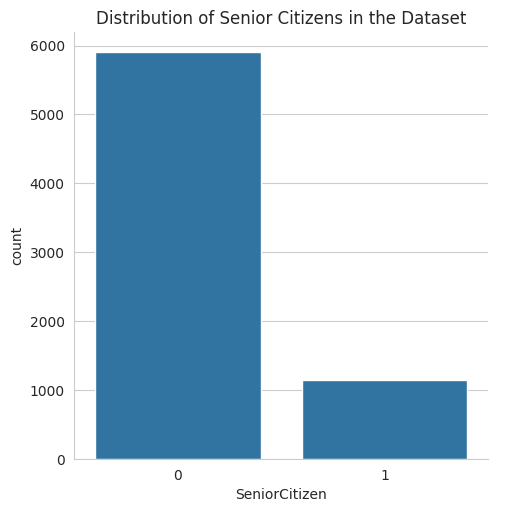

In [34]:
# Plot the count of records for each category in 'SeniorCitizen' using a categorical plot
sns.catplot(x="SeniorCitizen", kind="count", data=df_churn)

# Add a title to the plot
plt.title("Distribution of Senior Citizens in the Dataset")

# Display the plot
plt.show()

**The majority of the users are not Senior Citizen**

Total Charges

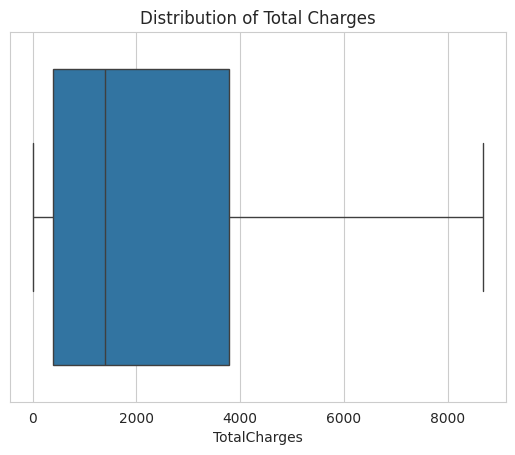

In [35]:
# Create a boxplot for the "TotalCharges" column from the df_churn DataFrame
sns.boxplot(x=df_churn["TotalCharges"])

# Add a title to the plot
plt.title("Distribution of Total Charges")

# Display the plot
plt.show()

**The total charges fall under 4000 for majority of the users**




##  **Build and Save the Cleaned Dataset**

In [ ]:
# Create a copy of the df_churn DataFrame to preserve the original data
df_churn_cleaned = df_churn.copy()

# Convert the 'Churn' column values to numeric: 1 for 'yes' and 0 for 'no'
# This is done by directly assigning the numeric value to rows where 'Churn' is 'yes' or 'no', considering case insensitivity
df_churn_cleaned.Churn[df_churn_cleaned.Churn.str.lower() == 'yes'] = 1
df_churn_cleaned.Churn[df_churn_cleaned.Churn.str.lower() == 'no'] = 0

# Change the data type of the 'Churn' column to float
# This conversion ensures that the 'Churn' column is now suitable for mathematical operations and model input
df_churn_cleaned['Churn'] = df_churn_cleaned['Churn'].astype('float')

In [ ]:
df_churn_cleaned

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0.0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0.0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1.0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0.0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0.0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0.0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0.0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1.0


In [ ]:
%cd /content/drive/My Drive/telecomchurn

In [ ]:
# Save the cleaned dataset CSV files for needed use

save_path = "/content/drive/My Drive/telecomchurn/datasets/"
df_churn_cleaned.to_csv(save_path + "Telco-Customer-Churn-cleaned.csv", header=True, index=False)